## Data Analysis Project

## Student Performance and Contributing Factors 



In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [39]:
"""Questions
1) How does the number of hours studied per week correlate with the final exam score?
2) Is there a significant relationship between class attendance percentage and exam scores?
3) Does the average number of sleep hours per night influence exam performance?
4) How does family income and parental education level impact the student's exam scores?
5) Do private school students perform better in exams than public school students?
"""


"Questions\n1) How does the number of hours studied per week correlate with the final exam score?\n2) Is there a significant relationship between class attendance percentage and exam scores?\n3) Does the average number of sleep hours per night influence exam performance?\n4) How does family income and parental education level impact the student's exam scores?\n5) Do private school students perform better in exams than public school students?\n"

In [40]:
data=pd.read_csv("StudentPerformanceFactors.csv")
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [41]:
print("Length of rows:",len(data))

Length of rows: 6607


In [42]:
data=data.drop_duplicates()
print("After removing the duplicates values:",len(data))
## no duplicate values

After removing the duplicates values: 6607


In [43]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [45]:
data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [46]:
data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

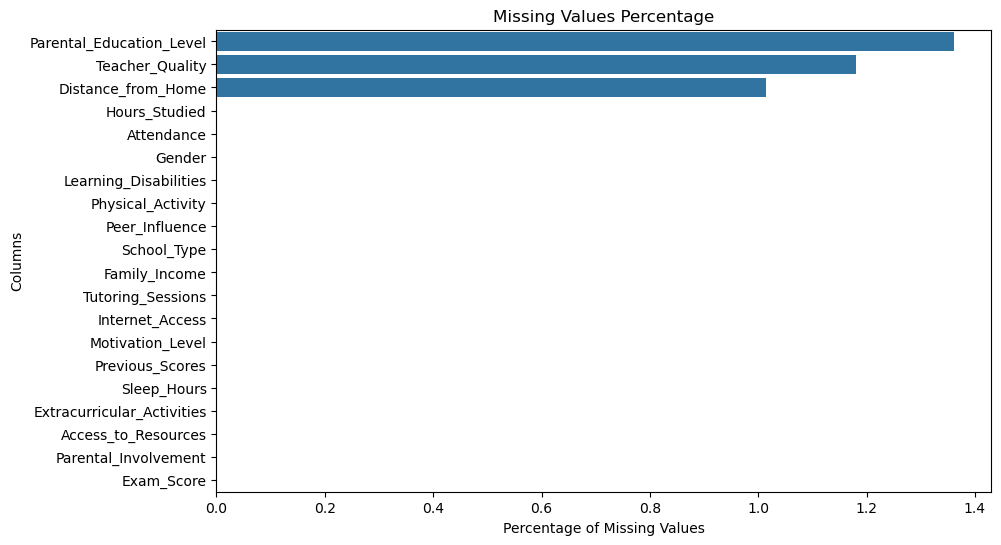

In [47]:
# Calculate missing values percentage
null_values = data.isnull().sum()
total_rows = len(data)
missing_percentage = (null_values / total_rows) * 100

# if i print missing_percentage it shows only percentage that's why i added columns for missing percentage
missing_df = pd.DataFrame({'Column': data.columns, 'MissingPercentage': missing_percentage})

plt.figure(figsize=(10, 6))
sns.barplot(x='MissingPercentage', y='Column', data=missing_df.sort_values(by='MissingPercentage', ascending=False))
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Values Percentage')
plt.show()

### To replace null values . If I remove null values , I will losse data so, instead of removing null values . 

### i replaced null values by mean or median, if the columns has outliers, i will replace by median value, if not i will replace by mean value

### Teacher_Quality,Parental_Education_Level,Distance_from_Home - these columns or object type so i will replace by mode or frequent type

In [48]:
data.head(1)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67


In [49]:
mode_1 = data['Teacher_Quality'].mode()[0]  # to access first mode of equal of items
data['Teacher_Quality'] = data['Teacher_Quality'].fillna(mode_1)

mode_2 =data['Parental_Education_Level'].mode()[0]
data['Parental_Education_Level']=data['Parental_Education_Level'].fillna(mode_2)

mode_3=data['Distance_from_Home'].mode()[0]
data['Distance_from_Home']=data['Distance_from_Home'].fillna(mode_3)




In [50]:
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [51]:
# No null values in a data

# 1) How does the number of hours studied per week correlate with the final exam score?

In [52]:
data.head(1)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67


In [53]:
study_exam=data[['Hours_Studied','Exam_Score','Gender']]
study_exam.head(1)

,Hours_Studied,Exam_Score,Gender
0,23,67,Male


In [54]:
study_exam.describe()

,Hours_Studied,Exam_Score
count,6607.000000,6607.000000
mean,19.975329,67.235659
std,5.990594,3.890456
min,1.000000,55.000000
25%,16.000000,65.000000
50%,20.000000,67.000000
75%,24.000000,69.000000
max,44.000000,101.000000


In [55]:
conditions=[
    (study_exam['Exam_Score']>=90),
    (study_exam['Exam_Score']>=80) & (study_exam['Exam_Score']<90),
    (study_exam['Exam_Score']>=70) & (study_exam['Exam_Score']<80),
    (study_exam['Exam_Score']>=60) & (study_exam['Exam_Score']<70),
    (study_exam['Exam_Score']>=50) & (study_exam['Exam_Score']<60),
    
]

grades=['O','A','B','C','Passed']

study_exam['grade']=np.select(conditions,grades)

C:\Users\karth\AppData\Local\Temp\ipykernel_21952\2106591679.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  study_exam['grade']=np.select(conditions,grades)


In [56]:
study_exam.head()

,Hours_Studied,Exam_Score,Gender,grade
0,23,67,Male,C
1,19,61,Female,C
2,24,74,Male,B
3,29,71,Male,B
4,19,70,Female,B


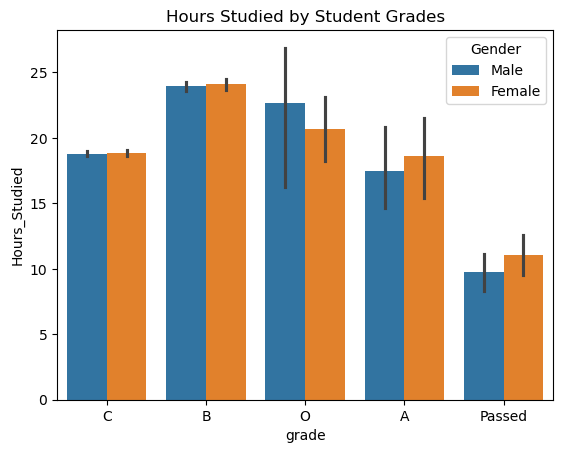

In [57]:
sns.barplot(data=study_exam,x='grade',y='Hours_Studied',hue='Gender')
plt.title("Hours Studied by Student Grades")
plt.show()

In [58]:
ograde=study_exam[study_exam['Exam_Score']>=90]
ograde

,Hours_Studied,Exam_Score,Gender,grade
94,18,100,Female,O
529,15,97,Female,O
770,24,94,Female,O
836,29,94,Male,O
919,21,97,Male,O
1109,31,92,Male,O
1525,27,101,Female,O
2292,21,91,Male,O
2425,23,99,Male,O
3124,19,94,Female,O


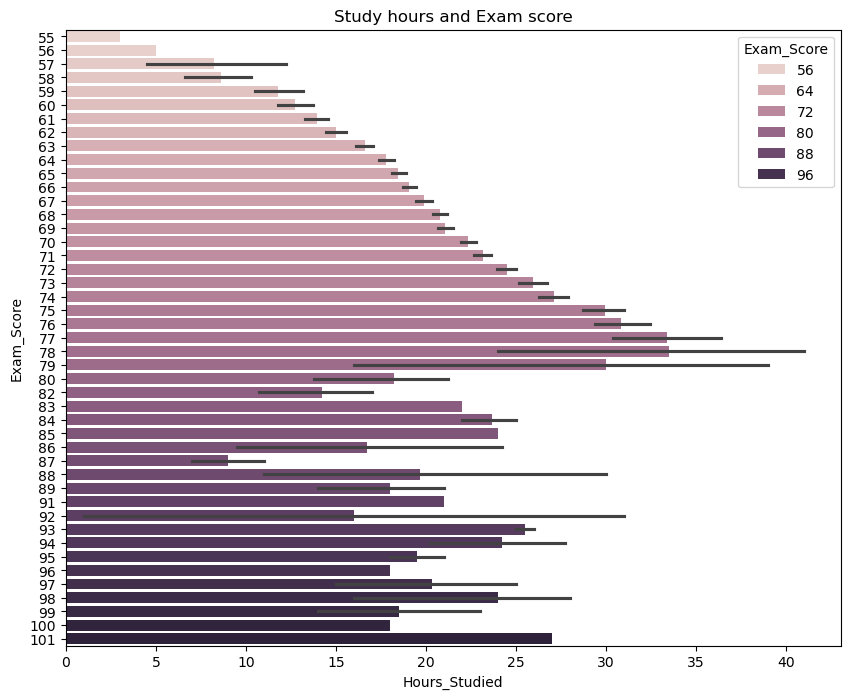

In [59]:
plt.figure(figsize=(10, 8))
sns.barplot(data=data,x='Hours_Studied',y='Exam_Score',orient='h',hue='Exam_Score')
plt.title("Study hours and Exam score")
plt.show()

In [60]:
corr=study_exam[['Hours_Studied','Exam_Score']].corr()
corr

,Hours_Studied,Exam_Score
Hours_Studied,1.000000,0.445455
Exam_Score,0.445455,1.000000


<Axes: >

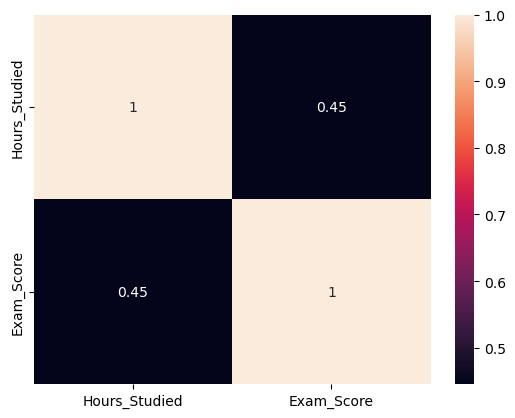

In [61]:
sns.heatmap(corr,annot=True)

### Number of Study hours is increased then Exam Score is also increased slightly

# 2) Is there a significant relationship between class attendance percentage and exam scores?


In [62]:
attend=data[['Attendance','Exam_Score','Gender']]
attend

,Attendance,Exam_Score,Gender
0,84,67,Male
1,64,61,Female
2,98,74,Male
3,89,71,Male
4,92,70,Female
...,...,...,...
6602,69,68,Female
6603,76,69,Female
6604,90,68,Female
6605,86,68,Female


In [63]:
att1=attend[['Attendance','Exam_Score']].corr()
att1

,Attendance,Exam_Score
Attendance,1.000000,0.581072
Exam_Score,0.581072,1.000000


<Axes: >

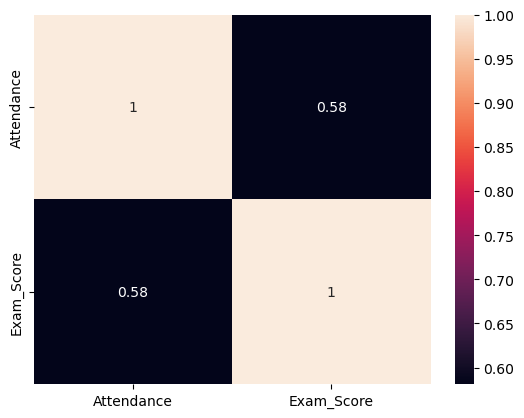

In [64]:
sns.heatmap(att1,annot=True)

## If attendance is increased then marks also increased

Text(0.5, 1.0, 'Gender Attend the class wise Marks')

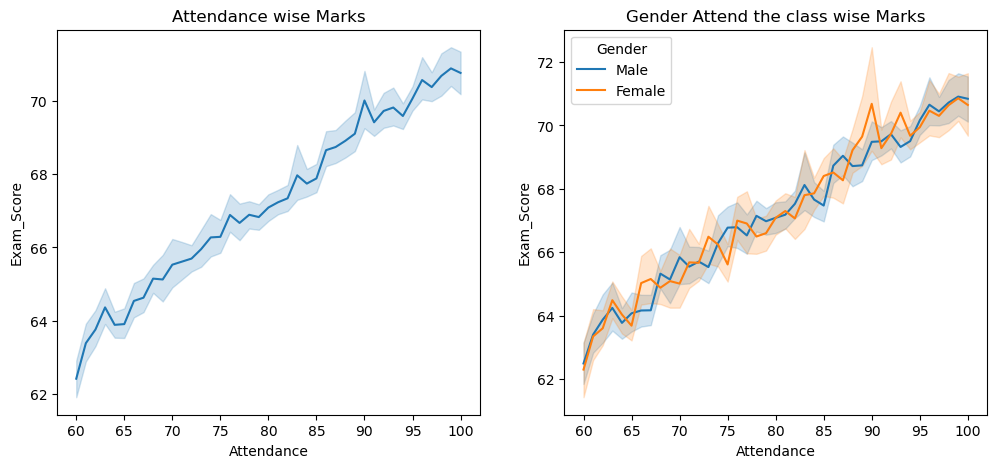

In [65]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.lineplot(data=attend,x='Attendance',y='Exam_Score')
plt.title("Attendance wise Marks")
plt.subplot(1,2,2)
sns.lineplot(data=attend,x='Attendance',y='Exam_Score',hue='Gender')
plt.title("Gender Attend the class wise Marks")

# 3) Does the average number of sleep hours per night influence exam performance?


In [66]:
avg_sleephours=data[['Sleep_Hours','Exam_Score','Gender']]
avg_sleephours.head()

,Sleep_Hours,Exam_Score,Gender
0,7,67,Male
1,8,61,Female
2,7,74,Male
3,8,71,Male
4,6,70,Female


In [67]:
avg_sleep_hours = avg_sleephours['Sleep_Hours'].mean()  
print("Avg sleep hours:", avg_sleep_hours)


Avg sleep hours Sleep_Hours    7.02906
dtype: float64


TypeError: unsupported format string passed to Series.__format__

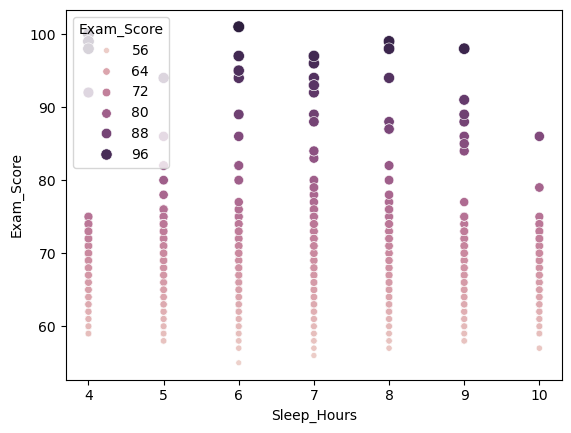

In [69]:
sns.scatterplot(data=avg_sleephours,x='Sleep_Hours',y='Exam_Score',size='Exam_Score',hue='Exam_Score')
plt.axvline(avg_sleep_hours, color='red', linestyle='--', label=f'Average Sleep Hours ({avg_sleep_hours:.2f})')


In [ ]:
avg_sleep=avg_sleephours[['Sleep_Hours','Exam_Score']].corr()
avg_sleep

## Sleep hours in this dataset do not have a significant impact on exam performance

# 4) How does family income and parental education level impact the student's exam scores?


In [ ]:
data.head(1)

In [ ]:
family=data[['Family_Income','Parental_Education_Level','Exam_Score']]

In [ ]:
family.head()

In [ ]:
sns.boxplot(data=family,x='Family_Income',y='Exam_Score',hue='Family_Income')
plt.title("Family Income will effect student marks or not")

In [ ]:
sns.boxplot(data=family,x='Parental_Education_Level',y='Exam_Score',hue='Parental_Education_Level')
plt.title("Parental education level will effect student marks")

In [ ]:
family.groupby(['Family_Income'])['Exam_Score'].mean()


### There is a slight positive correlation between family income and exam scores.
### High Income parents, their children getting marks good

In [ ]:
family.groupby(['Parental_Education_Level'])['Exam_Score'].mean()


### Parental education level appears to positively impact students' exam scores. Parents with higher education levels may provide better 

# 5) Do private school students perform better in exams than public school students?


In [ ]:
data.head(1)

In [ ]:
school_type=data[['School_Type','Exam_Score']]
school_type

In [ ]:
school_type['School_Type'].unique()

In [ ]:
public=school_type[school_type['School_Type']=='Public']
print("public school type marks mean:",public['Exam_Score'].mean())

In [ ]:
public=school_type[school_type['School_Type']=='Private']
print("private school type marks mean:",public['Exam_Score'].mean())

In [ ]:
sns.barplot(data=school_type,x='School_Type',y='Exam_Score',hue='School_Type',orient='v')
plt.title("Which student is perform better in exam")

### Private School students are performing good in exams